In [5]:
import kagglehub
data_path = kagglehub.dataset_download("naveedhn/amazon-product-review-spam-and-non-spam")
print(data_path)

C:\Users\Aybars\.cache\kagglehub\datasets\naveedhn\amazon-product-review-spam-and-non-spam\versions\1


In [3]:
import pandas as pd
import re # for regular expression
import nltk 
# detects unnecessary words like "the, a, is, in"
from nltk.corpus import stopwords
# detects roots of words
from nltk.stem import WordNetLemmatizer
import time
import os

try:
  stop_words = set(stopwords.words("english"))
except LookupError:
  nltk.download("stopwords")
  nltk.download("wordnet")
  nltk.download('omw-1.4')
  stop_words = set(stopwords.words("english"))

lemmatizer = WordNetLemmatizer()

def clean_text(text):
  if not isinstance(text, str):
    return "";
  text = text.lower()
  text = re.sub(r'[^a-zA-Z\s]', '', text, flags=re.I|re.A)
  tokens = text.split()
  tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
  return " ".join(tokens)

def parse_helpful(x):
  if isinstance(x, list) and len(x) == 2:
    return x[0], x[1]
  return 0, 0

In [10]:
FILE_PATH = os.path.join(data_path, "Toys_and_Games", "Toys_and_Games.json")

chunk_size = 1000000

processed_chunks = []

start_time = time.time()

iterator = pd.read_json(FILE_PATH, lines = True, chunksize = chunk_size)

base_path = os.path.dirname(os.getcwd())
out_dir = os.path.join(base_path, "data", "processed", "Toys_and_Games")
file_name = "toys_and_games.parquet"
full_path = os.path.join(out_dir, file_name)

if (os.path.exists(full_path)):
  print("File already exists")
else:
  print("Reading starts")

  for i, chunk in enumerate(iterator):
    print(f"Part {i} processing...")

    chunk = chunk.copy() 

    helpful_data = chunk['helpful'].apply(parse_helpful)

    chunk["helpful_votes"] = helpful_data.apply(lambda x : x[0])
    chunk["total_votes"] = helpful_data.apply(lambda x : x[1])
    chunk["helpfulness_ratio"] = (chunk["helpful_votes"] / chunk["total_votes"]) + 0000.1 # to not get 0

    chunk["full_text"] = chunk["summary"].astype(str) + " " + chunk["reviewText"].astype(str)
    chunk['cleaned_text'] = chunk['full_text'].apply(clean_text)

    final_chunk = chunk[["cleaned_text", "overall", "helpfulness_ratio", "class"]].copy()

    final_chunk.dropna(subset=['class'], inplace=True)
    # TODO
    final_chunk['class'] = final_chunk['class'].astype(int)

    processed_chunks.append(final_chunk)

  print("Processing completed")

  df = pd.concat(processed_chunks, ignore_index=True)

  end_time = time.time()

  print(f"Duration {end_time - start_time}")
  print(f"Total of {len(df)} lines processed")
  
  print("Saving data...")

  os.makedirs(out_dir, exist_ok=True)
  df.to_parquet(full_path)

  print("Data saved")

File already exists


Note: you may need to restart the kernel to use updated packages.


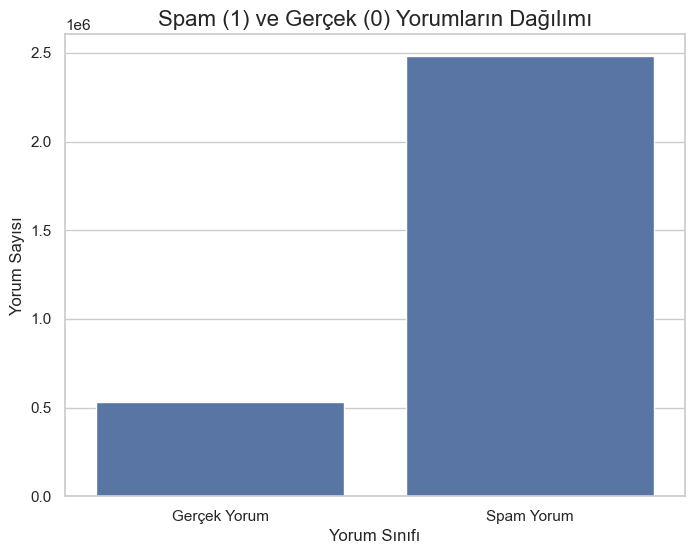

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

data = pd.read_parquet(full_path)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=data)
plt.title('Spam (1) ve Gerçek (0) Yorumların Dağılımı', fontsize=16)
plt.xlabel('Yorum Sınıfı', fontsize=12)
plt.ylabel('Yorum Sayısı', fontsize=12)
# Eksen etiketlerini daha anlamlı hale getirelim
plt.xticks(ticks=[0, 1], labels=['Gerçek Yorum', 'Spam Yorum'])
plt.show()

C:\Users\Aybars\AppData\Local\Temp\ipykernel_30676\1286341323.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='overall', data=data, palette='viridis')


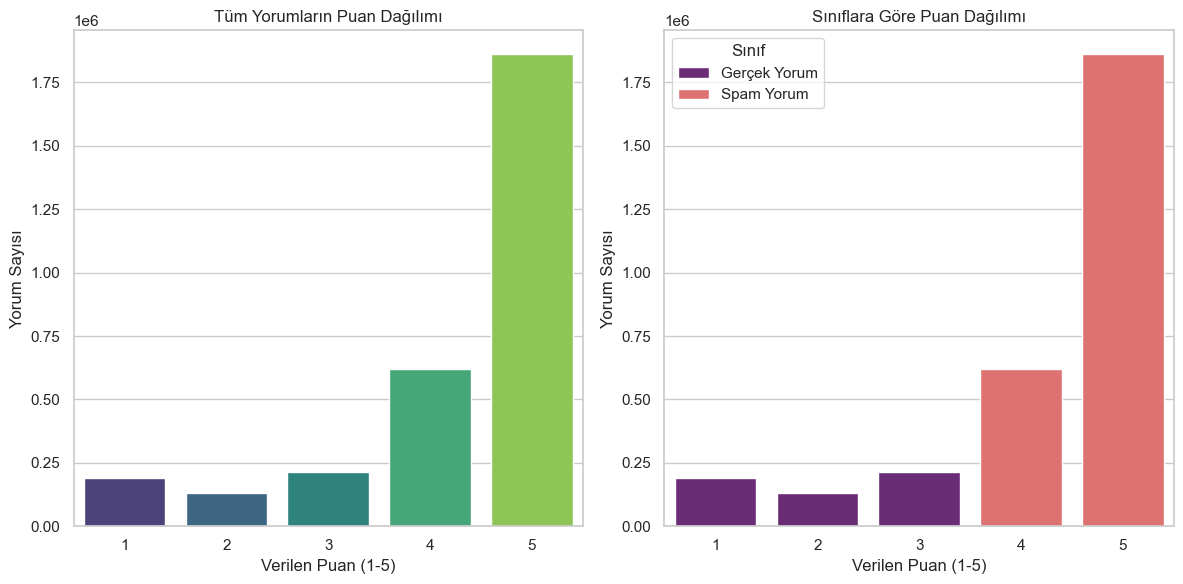

In [15]:
plt.figure(figsize=(12, 6))

# Tüm veri için puan dağılımı
plt.subplot(1, 2, 1) # 1 satır, 2 sütunluk grafiğin birincisi
sns.countplot(x='overall', data=data, palette='viridis')
plt.title('Tüm Yorumların Puan Dağılımı')
plt.xlabel('Verilen Puan (1-5)')
plt.ylabel('Yorum Sayısı')

# Sınıflara göre puan dağılımı
plt.subplot(1, 2, 2) # 1 satır, 2 sütunluk grafiğin ikincisi
sns.countplot(x='overall', hue='class', data=data, palette='magma')
plt.title('Sınıflara Göre Puan Dağılımı')
plt.xlabel('Verilen Puan (1-5)')
plt.ylabel('Yorum Sayısı')
plt.legend(title='Sınıf', labels=['Gerçek Yorum', 'Spam Yorum'])

plt.tight_layout() # Grafikler arası boşluğu ayarla
plt.show()

In [ ]:
FILE_PATH = os.path.join(data_path, "Sports_and_Outdoors", "Sports_and_Outdoors.json")

chunk_size = 1000000

processed_chunks = []

start_time = time.time()

iterator = pd.read_json(FILE_PATH, lines = True, chunksize = chunk_size)

base_path = os.path.dirname(os.getcwd())
out_dir = os.path.join(base_path, "data", "processed", "Sports_and_Outdoors")
file_name = "sports_and_outdoors.parquet"
full_path = os.path.join(out_dir, file_name)

if (os.path.exists(full_path)):
  print("File already exists")
else:
  print("Reading starts")

  for i, chunk in enumerate(iterator):
    print(f"Part {i} processing...")

    chunk = chunk.copy() 

    helpful_data = chunk['helpful'].apply(parse_helpful)

    chunk["helpful_votes"] = helpful_data.apply(lambda x : x[0])
    chunk["total_votes"] = helpful_data.apply(lambda x : x[1])
    chunk["helpfulness_ratio"] = (chunk["helpful_votes"] / chunk["total_votes"]) + 0000.1 # to not get 0

    chunk["full_text"] = chunk["summary"].astype(str) + " " + chunk["reviewText"].astype(str)
    chunk['cleaned_text'] = chunk['full_text'].apply(clean_text)

    final_chunk = chunk[["cleaned_text", "overall", "helpfulness_ratio", "class"]].copy()

    final_chunk.dropna(subset=['class'], inplace=True)
    # TODO
    final_chunk['class'] = final_chunk['class'].astype(int)

    processed_chunks.append(final_chunk)

  print("Processing completed")

  df = pd.concat(processed_chunks, ignore_index=True)

  end_time = time.time()

  print(f"Duration {end_time - start_time}")
  print(f"Total of {len(df)} lines processed")
  
  print("Saving data...")

  os.makedirs(out_dir, exist_ok=True)
  df.to_parquet(full_path)

  print("Data saved")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

data = pd.read_parquet(full_path)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=data)
plt.title('Spam (1) ve Gerçek (0) Yorumların Dağılımı', fontsize=16)
plt.xlabel('Yorum Sınıfı', fontsize=12)
plt.ylabel('Yorum Sayısı', fontsize=12)
# Eksen etiketlerini daha anlamlı hale getirelim
plt.xticks(ticks=[0, 1], labels=['Gerçek Yorum', 'Spam Yorum'])
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

# Tüm veri için puan dağılımı
plt.subplot(1, 2, 1) # 1 satır, 2 sütunluk grafiğin birincisi
sns.countplot(x='overall', data=data, palette='viridis')
plt.title('Tüm Yorumların Puan Dağılımı')
plt.xlabel('Verilen Puan (1-5)')
plt.ylabel('Yorum Sayısı')

# Sınıflara göre puan dağılımı
plt.subplot(1, 2, 2) # 1 satır, 2 sütunluk grafiğin ikincisi
sns.countplot(x='overall', hue='class', data=data, palette='magma')
plt.title('Sınıflara Göre Puan Dağılımı')
plt.xlabel('Verilen Puan (1-5)')
plt.ylabel('Yorum Sayısı')
plt.legend(title='Sınıf', labels=['Gerçek Yorum', 'Spam Yorum'])

plt.tight_layout() # Grafikler arası boşluğu ayarla
plt.show()